<a href="https://colab.research.google.com/github/gauravweb98/gauravweb98/blob/main/vision/getting-started/imagen3_image_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Copyright 2024 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Imagen 3 Image Generation

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_image_generation.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo"><br> Run in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fgenerative-ai%2Fmain%2Fvision%2Fgetting-started%2Fimagen3_image_generation.ipynb">
      <img width="32px" src="https://cloud.google.com/ml-engine/images/colab-enterprise-logo-32px.png" alt="Google Cloud Colab Enterprise logo"><br> Run in Colab Enterprise
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/vision/getting-started/imagen3_image_generation.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo"><br> Open in Vertex AI Workbench
    </a>
  </td>    
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_image_generation.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>

<div style="clear: both;"></div>

<b>Share to:</b>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_image_generation.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/8/81/LinkedIn_icon.svg" alt="LinkedIn logo">
</a>

<a href="https://bsky.app/intent/compose?text=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_image_generation.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/7/7a/Bluesky_Logo.svg" alt="Bluesky logo">
</a>

<a href="https://twitter.com/intent/tweet?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_image_generation.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/5a/X_icon_2.svg" alt="X logo">
</a>

<a href="https://reddit.com/submit?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_image_generation.ipynb" target="_blank">
  <img width="20px" src="https://redditinc.com/hubfs/Reddit%20Inc/Brand/Reddit_Logo.png" alt="Reddit logo">
</a>

<a href="https://www.facebook.com/sharer/sharer.php?u=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_image_generation.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/51/Facebook_f_logo_%282019%29.svg" alt="Facebook logo">
</a>            


| | |
|-|-|
|Author(s) | [Katie Nguyen](https://github.com/katiemn) |

## Overview

### Imagen 3

Imagen 3 on Vertex AI brings Google's state of the art generative AI capabilities to application developers. Imagen 3 is Google's highest quality text-to-image model to date. It's capable of creating images with astonishing detail. Thus, developers have more control when building next-generation AI products that transform their imagination into high quality visual assets. Learn more about [Imagen on Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/image/overview).


In this tutorial, you will learn how to use the Google Gen AI SDK for Python to interact with the Imagen 3 and Imagen 3 Fast models to generate images showcasing:

- Photorealistic scenes
- Prompt enhancement
- Text rendered within images
- Quality and latency comparisons within the two models

## Get started


### Install Google Gen AI SDK for Python


In [ ]:
%pip install --upgrade --quiet google-genai

### Authenticate your notebook environment (Colab only)

If you are running this notebook on Google Colab, run the following cell to authenticate your environment.


In [3]:
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

### Import libraries

In [4]:
from google import genai
from google.genai import types

### Set Google Cloud project information and create

---

\client

To get started using Vertex AI, you must have an existing Google Cloud project and [enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com).

Learn more about [setting up a project and a development environment](https://cloud.google.com/vertex-ai/docs/start/cloud-environment).

In [5]:
import os

PROJECT_ID = "gemini-workshop-30march"  # @param {type: "string", placeholder: "[your-project-id]", isTemplate: true}
if not PROJECT_ID or PROJECT_ID == "[your-project-id]":
    PROJECT_ID = str(os.environ.get("GOOGLE_CLOUD_PROJECT"))

LOCATION = os.environ.get("GOOGLE_CLOUD_REGION", "us-central1")

client = genai.Client(vertexai=True, project=PROJECT_ID, location=LOCATION)

### Define a helper function

In [7]:
import typing

import IPython.display
from PIL import Image as PIL_Image
from PIL import ImageOps as PIL_ImageOps


def display_image(
    image,
    max_width: int = 600,
    max_height: int = 350,
) -> None:
    pil_image = typing.cast(PIL_Image.Image, image._pil_image)
    if pil_image.mode != "RGB":
        # RGB is supported by all Jupyter environments (e.g. RGBA is not yet)
        pil_image = pil_image.convert("RGB")
    image_width, image_height = pil_image.size
    if max_width < image_width or max_height < image_height:
        # Resize to display a smaller notebook image
        pil_image = PIL_ImageOps.contain(pil_image, (max_width, max_height))
    IPython.display.display(pil_image)

### Load the image generation models

Imagen 3: `imagen-3.0-generate-002`

Imagen 3 Fast: `imagen-3.0-fast-generate-001`

In [8]:
generation_model = "imagen-3.0-generate-002"
generation_model_fast = "imagen-3.0-fast-generate-001"

### Imagen 3 & Imagen 3 Fast

With Imagen 3, you also have the option to use Imagen 3 Fast. These two model options give you the choice to optimize for quality and latency, depending on your use case.

**Imagen 3:** Generates high quality images with natural lighting and increased photorealism.

**Imagen 3 Fast:** Suitable for creating brighter images with a higher contrast. Overall, you can see a 40% decrease in latency in Imagen 3 Fast compared to Imagen 2.

With Imagen 3 and Imagen 3 Fast, you can also configure the `aspect ratio` to any of the following:
* 1:1
* 9:16
* 16:9
* 3:4
* 4:3

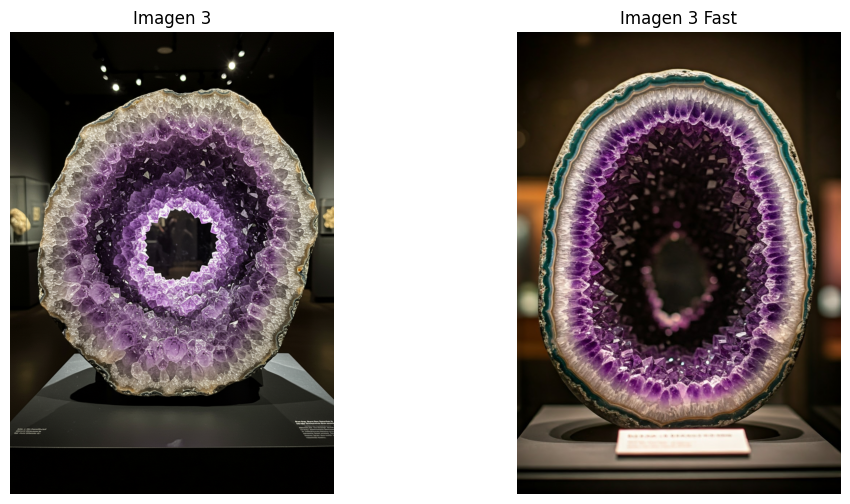

In [9]:
import matplotlib.pyplot as plt

prompt = """
a photorealistic image of the inside of an amethyst crystal on display in a museum
"""

# Imagen 3 image generation
image = client.models.generate_images(
    model=generation_model,
    prompt=prompt,
    config=types.GenerateImagesConfig(
        number_of_images=1,
        aspect_ratio="3:4",
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="DONT_ALLOW",
    ),
)

# Imagen 3 Fast image generation
fast_image = client.models.generate_images(
    model=generation_model_fast,
    prompt=prompt,
    config=types.GenerateImagesConfig(
        number_of_images=1,
        aspect_ratio="3:4",
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="DONT_ALLOW",
    ),
)

# Display generated images
fig, axis = plt.subplots(1, 2, figsize=(12, 6))
axis[0].imshow(image.generated_images[0].image._pil_image)
axis[0].set_title("Imagen 3")
axis[1].imshow(fast_image.generated_images[0].image._pil_image)
axis[1].set_title("Imagen 3 Fast")
for ax in axis:
    ax.axis("off")
plt.show()

### Prompt rewriter

The `imagen-3.0-generate-002` model offers the option to enhance your provided prompt. To utilize this feature, set `enhance_prompt` to True. A new, detailed prompt will be created from your original one to help generate higher quality images.

A wide-angle, high-quality photograph of a grand, opulent art museum with a high ceiling and marble floors, showcasing a collection of diverse paintings and sculptures. The museum's architecture is a blend of classic and modern styles, with large windows that flood the space with natural light. A few museum visitors are subtly placed within the scene, giving a sense of scale and the museum's role as a public space. The interior design features a sophisticated color palette of cream and gold, enhancing the elegance and refined atmosphere of the art museum. The overall impression is one of sophistication, with a timeless quality that emphasizes the role of art in culture and history.


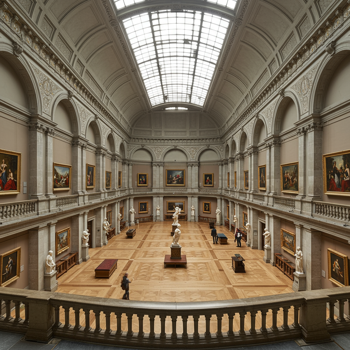

In [11]:
prompt = """
an art museum
"""

image = client.models.generate_images(
    model=generation_model,
    prompt=prompt,
    config=types.GenerateImagesConfig(
        number_of_images=1,
        aspect_ratio="1:1",
        enhance_prompt=True,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="DONT_ALLOW",
    ),
)

# Print the enhanced prompt
print(image.generated_images[0].enhanced_prompt)
display_image(image.generated_images[0].image)

### Photorealism and prompt understanding

**Photorealism:** Imagen 3 is capable of generating photorealistic, lifelike images with fewer distracting visual artifacts than our previous models. This increased quality is especially prevalent when generating images of multiple people, animals, and landscapes.

**Prompt adherence:** It's also better at understanding natural language and the intent behind your prompts. Thus, they can be written in everyday language and can include specific details including camera angles, lens types, lighting, and stylistic features.

When generating images of people you can also set the `safety_filter_level` and `person_generation` parameters accordingly:
* `person_generation`: DONT_ALLOW, ALLOW_ADULT, ALLOW_ALL
* `safety_filter_level`: BLOCK_LOW_AND_ABOVE, BLOCK_MEDIUM_AND_ABOVE, BLOCK_ONLY_HIGH, BLOCK_NONE

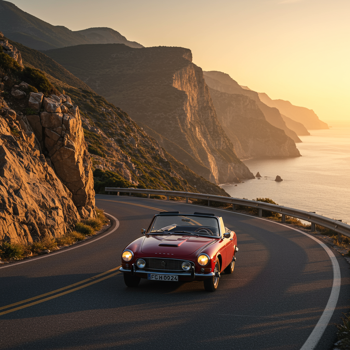

In [13]:
prompt = """
A vintage, red convertible car speeds along a winding cliffside road.
The car is slightly angled, facing towards the viewer, with one wheel slightly off the edge of the road.
The setting sun casts a warm, golden light across the scene, illuminating the car and the dramatic, rocky cliffs.
In the distance, the vast ocean stretches towards the horizon.
"""

image = client.models.generate_images(
    model=generation_model,
    prompt=prompt,
    config=types.GenerateImagesConfig(
        number_of_images=1,
        aspect_ratio="1:1",
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="DONT_ALLOW",
    ),
)

display_image(image.generated_images[0].image)

### Better text rendering

Imagen 3 also does a great job accurately rendering small words and phrases in images. This could be particularly useful for generating business cards, posters, banners, product designs, or greeting cards.

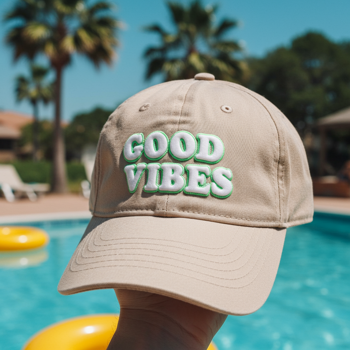

In [14]:
prompt = """
a beige baseball cap with 'good vibes' written on top in white bubbly stitched letters that are outlined in neon green,
display it against a pool background with palm trees and pool floats
"""

image = client.models.generate_images(
    model=generation_model,
    prompt=prompt,
    config=types.GenerateImagesConfig(
        number_of_images=1,
        aspect_ratio="1:1",
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="DONT_ALLOW",
    ),
)

display_image(image.generated_images[0].image)

### Add image watermark

By default, a digital watermark, or [SynthID](https://deepmind.google/technologies/synthid/), is added to Imagen 3 images. If you would like to explicitly set the watermark to True, you can do so with the `add_watermark` parameter. You can also [verify a watermarked image](https://cloud.google.com/vertex-ai/generative-ai/docs/image/generate-images#watermark).

A whimsical candy store overflowing with colorful, sugary delights, in a vintage style, with a wide angle, eye-level view. Jars of all shapes and sizes are filled with vibrant gummies, lollipops, and rock candy, each a different shade of rainbow. The walls are adorned with antique candy dispensers and playful, hand-painted murals depicting fantastical sweets and creatures.  Sunlight streams through the large window, illuminating a dusty counter piled high with whimsical chocolate sculptures and ornate boxes of chocolates. The overall tone is light and playful, with a dreamy, candy-coated aesthetic, in a cinematic shot, using a Canon EOS R5 camera, with high contrast and pastel colors, that would make Willy Wonka jealous.


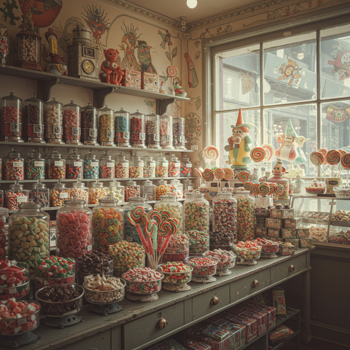

In [17]:
prompt = """
a whimsical candy store
"""

image = client.models.generate_images(
    model=generation_model,
    prompt=prompt,
    config=types.GenerateImagesConfig(
        number_of_images=1,
        aspect_ratio="1:1",
        enhance_prompt=True,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="DONT_ALLOW",
        add_watermark=True,
    ),
)

# Print the enhanced prompt
print(image.generated_images[0].enhanced_prompt)
display_image(image.generated_images[0].image)